#### Welcome to the Dark Energy worksheet. It's due March 5 @ 2pm.

#### Please upload to Blackboard the .ipynb file, containing your last name.

#### Original work statement: 

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

#### Your name: Emmanuel Gil

The worksheet is organized as a series of tasks. You can edit this notebook directly by adding code (and comment) cells to perform these tasks. You will need to import packages, even if this is not explicitly requested.

One function from a package that we haven't mentioned so far but you might need is scipy.integrate (numerical integration).

#### Task 1: import the data from the file sn_data.txt

This data set contains three columns. 

The first one is the redshift of the supernovae. Redshift is a measure of the velocity at which supernovae are moving away from us. Redshift = 0 means no motion, increasing values represent increasing velocity. Redshift has no units.

The second column is the distance of the supernovae, expressed in the units of Mpc (megaparsec). Mega = 1 Million; 1 parsec (pc) = 3.26 light years.

The third column contains the error on the distance (let's call it sigma(d)), again expressed in Mpc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Characteristics = np.genfromtxt('Data_ws2.dat',usecols = (0,1,2),skip_header=1)
redshift = np.genfromtxt('Data_ws2.dat', usecols = 0, skip_header= 1)
supern = np.genfromtxt('Data_ws2.dat', usecols = 1, skip_header = 1)
sigma = np.genfromtxt('Data_ws2.dat',usecols = 2, skip_header = 1)

#### Task 2: Make an errorbar plot of this data set.

Place redshift (z) on the x axis, distance on the y axis, and sigma(d) as the error on the distance. Add labels to the axes and don't forget the units.

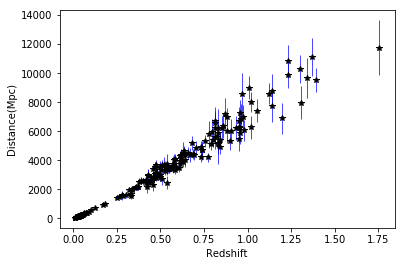

In [2]:
#Check if I should put MegaParsec(MPC) or pc
x = redshift
error_y = sigma
y = supern

plt.errorbar(x, y, yerr=error_y, fmt='*k', ecolor='blue', elinewidth=.7, capsize=0);
plt.xlabel('Redshift');
plt.ylabel('Distance(Mpc)');


#### A few words on our model

The plot that you just made just shows the data. Now what we want to do is to build different models for the distance of these supernovae, and then choose the model that works best.

Our model for the distance (called "Luminosity Distance" by physicists) is a function of different parameters: 

- z (the redshift) is the independent variable; in other words, our model for the distance will return a distance for any redshift value.

- Omegam is the percentage of matter in the Universe, and it's a number between 0 and 1;

- OmegaDE is the percentage of Dark Energy in the Universe; we can assume that Omegam + OmegaDE = 1 (so the Universe only contains matter and dark energy), which simplifies our model a little bit, because we can write OmegaDE = 1 - Omegam;

- H0 is the Hubble constant, which gives the current rate of expansion of the Universe; we will fix it in the beginning to be = 70 km/s/Mpc;

- c is the speed of light in km/s; c = 2.99 x 10**5. This is a constant of nature so we won't need to change it.

Here comes our model:


\begin{align}
D_L(z,\Omega_m, H_0, c) = \,(1+z) \frac{c}{H_0}\int_0^z \frac{dx}{\sqrt{\Omega_m(1+x)^3 + \Omega_{DE}}} 
\end{align}

#### Task 3: Complete this function definition.

Notes: 

1. Omega_DE is not a parameter of the function, so make sure you write your function as a function of Omega_m only.

2. It might be easier to first define a function for the integrand
       
3. You might find useful to invoke the scipy.integrate.quad function of the scipy package and to look at the examples here
       
https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/integrate.html

       
def LumDist(z, Omegam = 0.7, H0 = 70, ckms = 2.9979 $\times 10^5$) :

    ###write the function here


In [3]:
import scipy.integrate as integrate
def LumDist(redshift, Omega_m = 0.7, H0 = 70, ckms = 2.9979 * 10**5 ):
    # to get OmegaDE we just use the logic that there are only 2 forms of matter in the universe
    # So both OmegaM and OmegaDE should total to 1 so we can get the OmegaDE by just subtracting OmegaM from 1 :)
    return((1+redshift)*(ckms/H0)* integrate.quad(lambda x: 1/np.sqrt(Omega_m*((1+x)**3)+(1-Omega_m)), 0, redshift)[0])
    

#### Task 4

1. Answer the questions: What are the arguments of the LumDist function? Which ones have default values?

2. Check that LumDist(1) ~ 5512 and LumDist(0.5) ~ 2522

In [4]:
#1 the arguments for the function LumDist are redshift, Omega_M, H0, and all of the arguments have default values except(redshift)
#2
print("LumDist(1):",LumDist(1))
print("LumDist(0.5):",LumDist(0.5))

LumDist(1): 5512.274175117096
LumDist(0.5): 2521.9714288948917


#### Task 5

Vectorize the function so we can give it a 1D array of redshifts as input. Check that it works by 
defining a numpy array as the first column of your supernova data and feeding it to your function.

In [5]:
#np.vectorize doesn't change LumDist so we have to set it to some other variable and use that as our vectorized function
LumDistVect = np.vectorize(LumDist)
#redshift is already an array so even if I did np.array on it, it would be the same.
LumDistVect(redshift)

array([   43.02919451,    43.02919451,    43.02919451,    56.01606079,
          56.01606079,    60.35295154,    60.35295154,    60.35295154,
          64.69379657,    69.03858787,    69.03858787,    69.03858787,
          69.03858787,    73.38731746,    73.38731746,    73.38731746,
          73.38731746,    73.38731746,    77.73997739,    77.73997739,
          82.09655971,    90.82145992,    99.561955  ,    99.561955  ,
         103.938031  ,   108.31798223,   108.31798223,   112.70180089,
         112.70180089,   112.70180089,   117.08947921,   121.48100945,
         125.87638389,   125.87638389,   130.27559481,   134.67863454,
         139.08549541,   143.49616977,   147.91065   ,   156.75099771,
         156.75099771,   156.75099771,   165.60647795,   174.47703049,
         187.81098886,   196.71896068,   201.17852427,   214.57943747,
         219.05379162,   219.05379162,   228.01353083,   232.49890138,
         245.97693024,   254.98047536,   268.51293919,   277.55259648,
      

#### Task 6

Plot the data with error bars as before, and then the luminosity distance values for the supernovae predicted by these three models:
    
Model 1: Omega_m = 0 
    
Model 2: Omega_m = 0.3
    
Model 3: Omega_m = 1

Make sure you add labels for all the models.
    


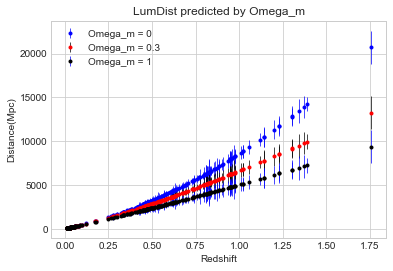

In [46]:
#Find out how to make the subplots a bit bigger so that we can see the error bars a bit more clear for future!
x = redshift
error_y = sigma
ymodone = LumDistVect(redshift, Omega_m = 0)
#plt.subplot(3, 1, 1)
plt.errorbar(x, ymodone,sigma, fmt='.b', ecolor='blue', elinewidth=.7, capsize=0, label ='Omega_m = 0');
plt.title('LumDist predicted by Omega_m');
plt.xlabel('Redshift');
plt.ylabel('Distance(Mpc)');

ymodtwo = LumDistVect(redshift, Omega_m = 0.3)
#plt.subplot(3,1,2)
plt.errorbar(x, ymodtwo,sigma, fmt='.r', ecolor='black', elinewidth=.7, capsize=0, label ='Omega_m = 0.3');
plt.xlabel('Redshift');
plt.ylabel('Distance(Mpc)');

ymodthree = LumDistVect(redshift, Omega_m = 1)
#plt.subplot(3,1,3)
plt.errorbar(x, ymodthree,sigma, fmt='.k', ecolor='blue', elinewidth=.7, capsize=0, label ='Omega_m = 1');
plt.xlabel('Redshift');
plt.ylabel('Distance(Mpc)');
#plt.tight_layout(); use this if using subplots to make whitespace inbetween plots and look nice
plt.legend();
plt.show();
#not sure If I was supposed to do subplots here or put them all in 1 plot like this!

#### Task 7

Answer the following questions:

1) What are the Omega_DE values for the above models? Which model contains no Dark Energy at all?

2) Just judging by eye, which model seems to be the best fit to the data and why?

In [7]:
Omega_m = 0 
Om_DEMod1 = (1-Omega_m)
print('Value of Omega_DE for model#1:',Om_DEMod1)

Omega_m = 0.3
Om_DEMod2 = (1-Omega_m)
print('Value of Omega_DE for model#2:',Om_DEMod2)

Omega_m = 1
Om_DEMod3 = (1-Omega_m)
print('Value of Omega_DE for model#3:',Om_DEMod3)

Value of Omega_DE for model#1: 1
Value of Omega_DE for model#2: 0.7
Value of Omega_DE for model#3: 0


#### 1) Omega_DE values for above models(above cell ^) - The model that has no Omega_DE is model 3 because assuming that there is only matter and dark energy in the universe we set the sum of those values to 1 and so if the value of matter is 1 there is no dark energy
#### 2) If I am just judging by eye it seems that the second model is the best fit to the data because almost a straight line!

#### Task 8

It is now time to define a proper function to judge whether these models are good fit to the data. This is done through the $\chi^2$ function that we mentioned in the "Fit a line" worksheet.

Complete the following function:

def chi2(x,x_err,y): 

    Write a function that computes the chi2 between a vector containing measurements (x) and their experimental errors (x_err), with respect to a vector of model predictions y 

   

In [8]:
modeldistances = LumDistVect(redshift)
def chi2(x,y_err,y):
    return np.sum(((x - y)**2)/y_err**2)

#### Task 9

Calculate the $\chi^2$ of the model with Omega_m = 0.3. 
    
(Hint: your "y" vector is the vector of luminosity distances for all the supernovae)

In [40]:
y = LumDistVect(supern)
y
chi2(LumDistVect(redshift,Omega_m = 0.3),sigma,supern)
#print(y[:5])

308.1221776880534

#### Task 10

And now the magic begins!

1. Calculate and save the $\chi^2$ values for different models with values of Omega_m between 0 and 1, spaced every 0.05.

2. Create a scatter plot that has the values of Omega_m on the x axis, and the value of the $\chi^2$ on the y axis.

In [26]:
#Do chi2 calculation with [0,1,0.05] step 0.05 
#Make sure to plot the axis labels and legend
Omega_mvec = np.arange(0.0,1.05,.05)
#Omega_mvec
chi2Omega_m = []
for i in Omega_mvec:
    Chi2Omeg = chi2(LumDistVect(redshift,i),sigma,supern)
    chi2Omega_m.append(Chi2Omeg)
    print("The chi2 value is:",Chi2Omeg,"of Omega_m:",i)
    print()
 

The chi2 value is: 447.81951103787316 of Omega_m: 0.0

The chi2 value is: 312.94109451568886 of Omega_m: 0.05

The chi2 value is: 254.30626851002583 of Omega_m: 0.1

The chi2 value is: 237.20959594170736 of Omega_m: 0.15000000000000002

The chi2 value is: 245.73655415691104 of Omega_m: 0.2

The chi2 value is: 271.14400377921044 of Omega_m: 0.25

The chi2 value is: 308.1221776880535 of Omega_m: 0.30000000000000004

The chi2 value is: 353.229126587261 of Omega_m: 0.35000000000000003

The chi2 value is: 404.12843292427556 of Omega_m: 0.4

The chi2 value is: 459.1788116487843 of Omega_m: 0.45

The chi2 value is: 517.196501092469 of Omega_m: 0.5

The chi2 value is: 577.3098622391346 of Omega_m: 0.55

The chi2 value is: 638.8664253789287 of Omega_m: 0.6000000000000001

The chi2 value is: 701.3713186402631 of Omega_m: 0.65

The chi2 value is: 764.4452658976371 of Omega_m: 0.7000000000000001

The chi2 value is: 827.7952149544703 of Omega_m: 0.75

The chi2 value is: 891.1933582423247 of Omega_m

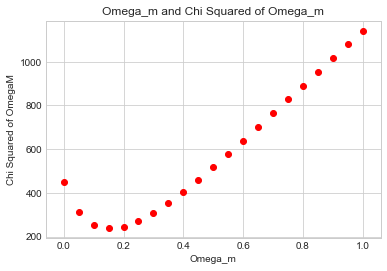

In [19]:
plt.style.use('seaborn-whitegrid')
omg_omgchi2 = plt.scatter(Omega_mvec,chi2Omega_m,c='r')
plt.title("Omega_m and Chi Squared of Omega_m")
plt.xlabel("Omega_m")
plt.ylabel("Chi Squared of OmegaM");
# Lol! it looks like a check mark I hope I get it correct or else that would be ironic :D

#### Task 11

Find the model with the lowest $\chi^2$ and answer the questions:

1. Which value of Omega_m corresponds to this model? 

2. Which value of Omega_DE corresponds to this model?

3. Based on your answers, is a non-zero value of Dark Energy supported by the data?

In [12]:
#we can use the chi2.min() then then .index of that lowest 
lowestchi2mod = np.min(chi2Omega_m)
index = chi2Omega_m.index(lowestchi2mod)
print("The index of the model with the lowest chi2:",index)
print("The value of Omega_m that corresponds with the index:",Omega_mvec[index])

The index of the model with the lowest chi2: 3
The value of Omega_m that corresponds with the index: 0.15000000000000002


#### Based on my answers a non-zero value of Dark Energy is supported by the data because the lowest chi squard value has an omega m value less than one which implies that omega_DE is not zero! because the sum of the two should be 1
#### The larger the chi squared the worse/ less accurate

#### Task 12 (optional, for Extra Credit)

Repeat the $\chi^2$ analysis for a two parameter model, with Omega_m varying between 0 and 1 in 0.05 intervals 
and H_0, the Hubble constant, varying between 50 and 80 km/s/Mpc in intervals of 5 km/s/Mpc.

What are the values of Omega_m and H_0 that correspond to the lowest $\chi^2$? How do your conclusions change in this case?



In [39]:
# x = [1, 3, 4]
# y = [5, 6, 7]

# for i, j in zip(x,y):
#     print(i,j)
# zip! is awesome
Hubblevary = np.arange(50,85,5)
Hubblevary
chi2Omg_Hubble = []
for i,j  in zip (Omega_mvec,Hubblevary):
    Chi2Hub = chi2(LumDistVect(redshift,i,j),sigma,supern)
    chi2Omg_Hubble.append(Chi2Hub)
    print('The Chi Squared Value is:',Chi2Hub,"of Omega_m:",i,"and of Hubble Constant:",j)
    print()

The Chi Squared Value is: 4843.449176737004 of Omega_m: 0.0 and of Hubble Constant: 50

The Chi Squared Value is: 2062.635299882935 of Omega_m: 0.05 and of Hubble Constant: 55

The Chi Squared Value is: 748.5410907668089 of Omega_m: 0.1 and of Hubble Constant: 60

The Chi Squared Value is: 257.1778232626029 of Omega_m: 0.15000000000000002 and of Hubble Constant: 65

The Chi Squared Value is: 245.73655415691104 of Omega_m: 0.2 and of Hubble Constant: 70

The Chi Squared Value is: 517.9587926437198 of Omega_m: 0.25 and of Hubble Constant: 75

The Chi Squared Value is: 956.5899044012422 of Omega_m: 0.30000000000000004 and of Hubble Constant: 80



In [47]:
lowchi2Omg_Hub = np.min(chi2Omg_Hubble)
index_chi2 = chi2Omg_Hubble.index(lowchi2Omg_Hub)
print("The index of the model with the lowest chi squared of (Omega_m and Hubble Constant) is:",index_chi2)
print("The value of Omega_m and Hubble Constant that corresponds with the index:",Omega_mvec[index_chi2],Hubblevary[index_chi2])
print()


The index of the model with the lowest chi squared of Omega_m and Hubble Constant is: 4
The value of Omega_m and Hubble Constant that corresponds with the index: 0.2 70



#### My conclusion is that the hubble constant should be at 70 because that gives us the lowest Chi Squared value. This still supports a non zero value because omega_m is less than 1 so there has to be dark energy and the specific value at which the chi squared value was the lowest was when the hubble constant was 70